# ALF Tutorial for $\lambda$ Dynamics Workshop

In [1]:
import alf
import os, subprocess
import numpy as np
alf_tutorial_dir=os.getcwd()

## I. Statement of the Problem

ALF estimates free energy differences between physical states drawn from an equilibrium distribution using a histogram based estimator. States with $\lambda>0.99$ are counted as $\lambda=1$. The number of times a state is observed gives its probability $P_i$, which can be converted to a free energy:
$$ G=-kT\ln(P_i)$$

The assumption of equilibrium gives rise to two problems
* If states differ in free energy by more than 2-3 kcal/mol, higher free energy states will not be sampled enough to accurately estimate their probability
* If there are barriers or traps between physical states of height $\Delta G^{\ddagger}$, the rate ($k$) of coming to equilibrium slows down exponentially
$$ k \propto \exp(-\Delta G^{\ddagger}/k_BT)$$

The solution to these problems is to flatten the alchemical space as a function of the alchemical coordinates $\lambda$ to maximize the rate of convergence of the simulations

## II. Test System: 1,4-substituted-benzene Solvation Free Energy

Solvation free energy of 1,4-substituted-benzene. Focus on vacuum side of solvation free energy to obtain quick results.
* 5 substituents at first site
* 6 substituents at second site (omit carboxylic acid due to protonation changes)

Several experimental results are available from early SAMPL challenges

<img src="Figures/14benz/14benz.jpeg" alf="1,4-benzene" width=250/>

JZ Vilseck, X Ding, RL Hayes, & CL Brooks III. Generalizing the Discrete Gibbs Sampler-Based $\lambda$-Dynamics Approach for Multisite Sampling of Many Ligands. JCTC 17:3895–3907 (2021)

DOI: <a href=https://doi.org/10.1021/acs.jctc.1c00176>10.1021/acs.jctc.1c00176</a>

## III. Profiles

Projections of the alchemical free energy landscape along 1-D and 2-D alchemical reaction coordinates are taken to assess whether the free energy landscape is flat
* 1-D profiles bin as a function of a single variable (e.g. $\lambda_{1}$)
* 2-D profiles bin as a function of two variables (e.g. $\lambda_{1}$ and $\lambda_{2}$)
* 1-D transitions profiles bin progress ($\lambda_1/(\lambda_1+\lambda_2)$) only along the transition path ($\lambda_{1}+\lambda_{2}>0.8$)

<img src="Figures/Profile/Bins2.jpg" alf="Bins" width=400/>

* 2-D profiles as a function of $\lambda$ variables at two different sites may be used if there is significant coupling between sites

(See optional "ntersite" parameter for alf module)

1-D profiles consist of 400 bins, 2-D profiles consist of 20x20 bins

### III.A alf.PlotFreeEnergy5() Is Useful For Visualizing Free Energy Profiles

Run help on alf.PlotFreeEnergy5 to learn about usage.

In [2]:
help(alf.PlotFreeEnergy5)

Help on function PlotFreeEnergy5 in module alf.util.PlotFreeEnergy:

PlotFreeEnergy5(directory=None, ntersite=[0, 0])
    Plots free energy profiles for a cycle of alf
    
    This should be run after alf.postprocess has completed because it
    displays the free energy profiles computed by alf.RunWham
    
    Parameters
    ----------
    directory : str, optional
        A string for the analysis directory of the cycle of interest. If
        blank, analysis will be performed in this directory. (default is
        None)
    ntersite : list of int, optional
        The ntersite list used during postprocessing on this cycle of alf.
        If the second element of the list is incorrect, multisite systems
        will not display correctly. (default is [0,0])



Plot free energy profiles from early in flattening

/home/rhaye/miniconda3/envs/lambda/lib/python3.10/site-packages/mpl_toolkits/mplot3d/art3d.py:1187: RuntimeWarning: invalid value encountered in subtract
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/home/rhaye/miniconda3/envs/lambda/lib/python3.10/site-packages/mpl_toolkits/mplot3d/art3d.py:1186: RuntimeWarning: invalid value encountered in subtract
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/home/rhaye/miniconda3/envs/lambda/lib/python3.10/site-packages/numpy/core/numeric.py:1647: RuntimeWarning: invalid value encountered in multiply
  multiply(a1, b2, out=cp0)
/home/rhaye/miniconda3/envs/lambda/lib/python3.10/site-packages/numpy/core/numeric.py:1650: RuntimeWarning: invalid value encountered in multiply
  multiply(a2, b0, out=cp1)
/home/rhaye/miniconda3/envs/lambda/lib/python3.10/site-packages/numpy/core/numeric.py:1652: RuntimeWarning: invalid value encountered in subtract
  cp1 -= tmp


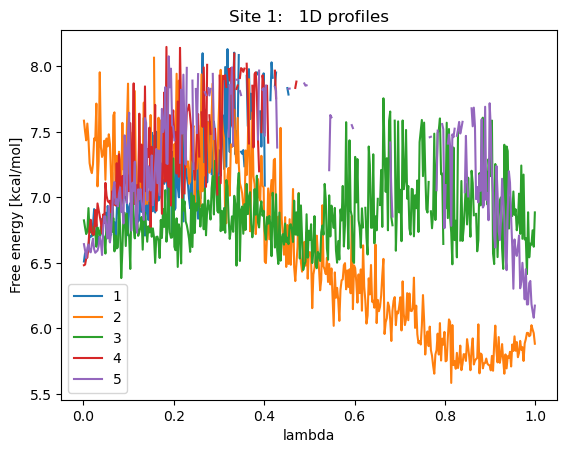

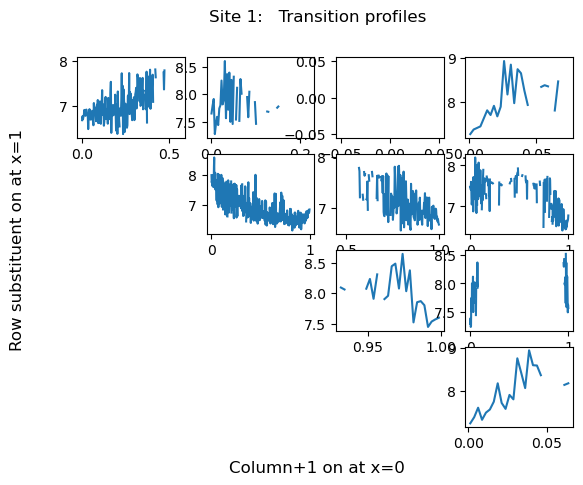

/home/rhaye/miniconda3/envs/lambda/lib/python3.10/site-packages/mpl_toolkits/mplot3d/proj3d.py:180: RuntimeWarning: invalid value encountered in divide
  txs, tys, tzs = vecw[0]/w, vecw[1]/w, vecw[2]/w


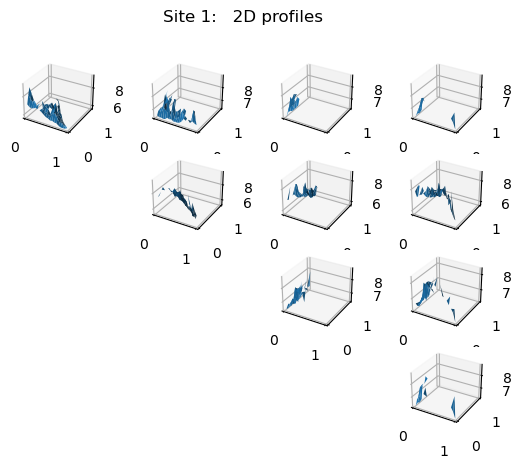

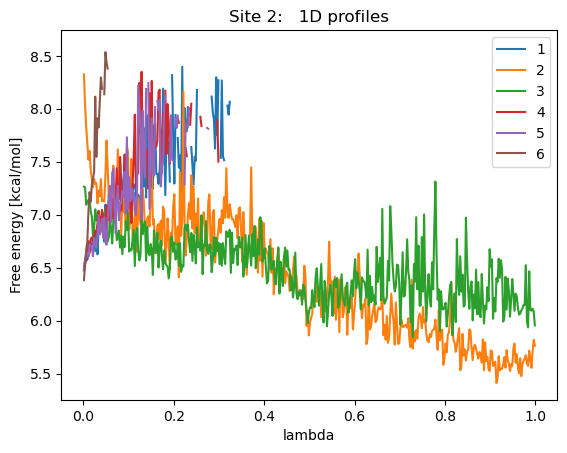

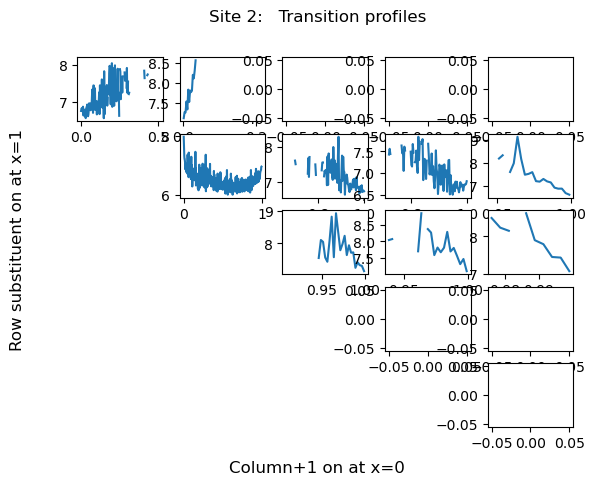

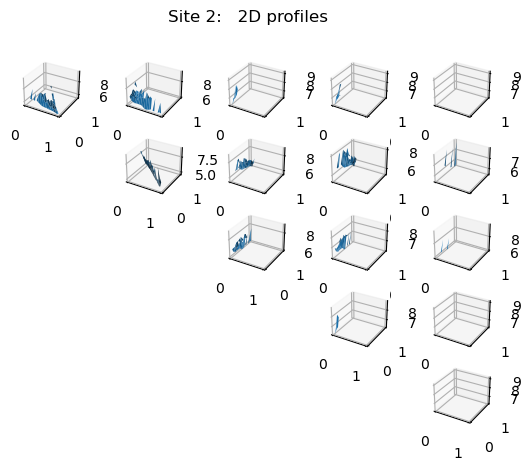

In [3]:
alf.PlotFreeEnergy5('prerun/analysis4')

Plot free energy profiles from end of production

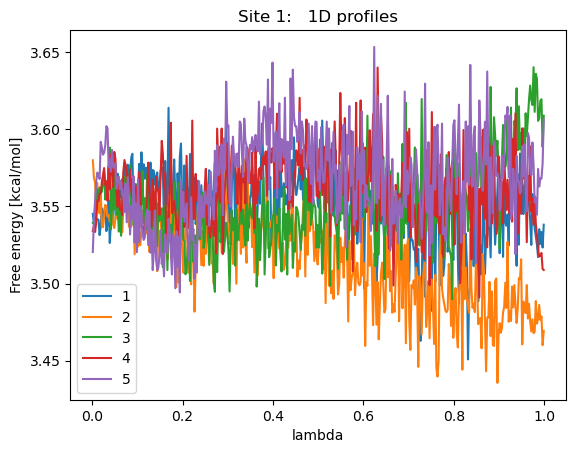

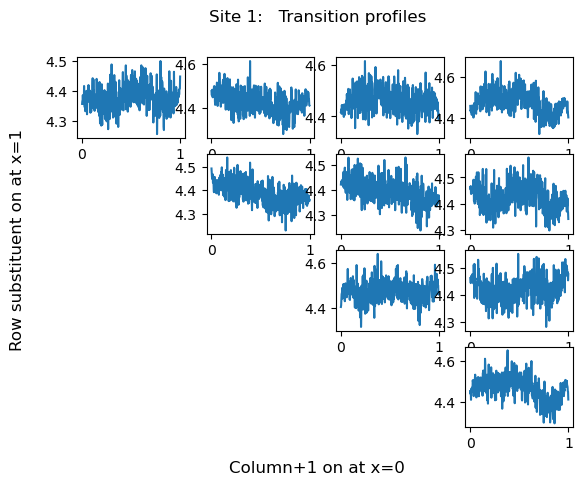

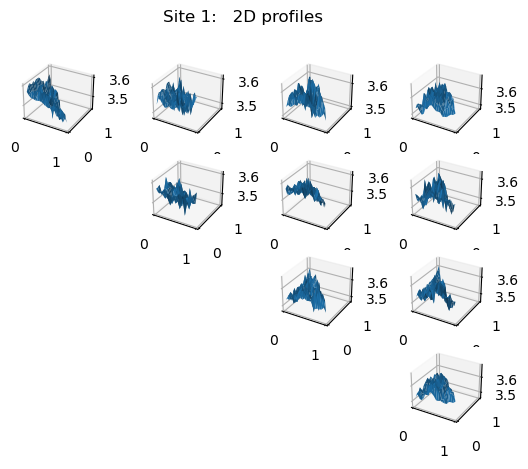

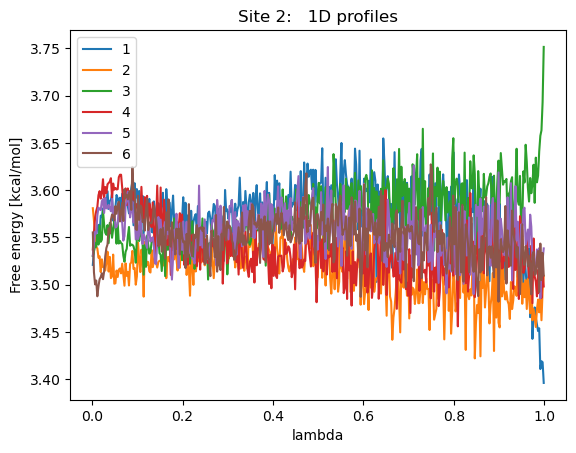

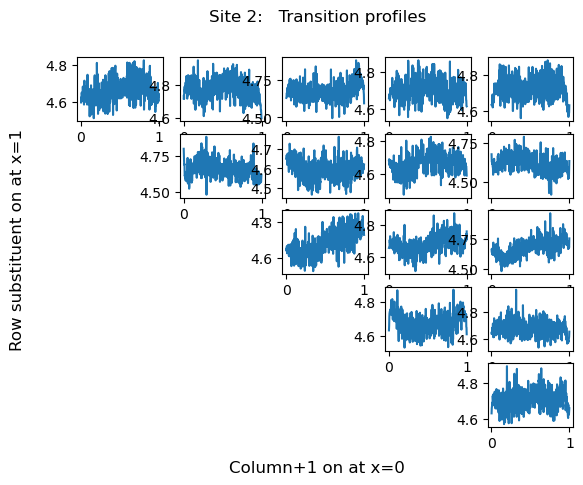

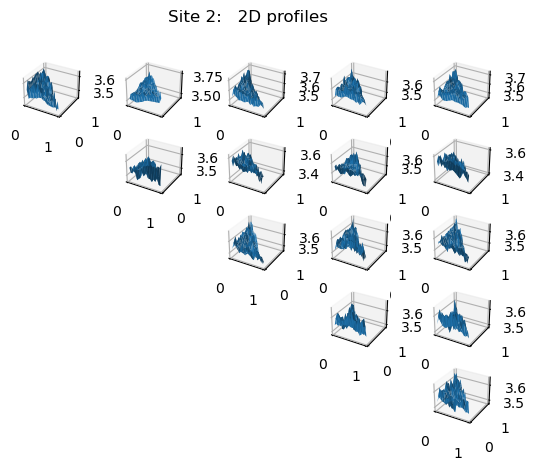

In [4]:
alf.PlotFreeEnergy5('prerun/analysis61')

## IV. Biases

Alchemical barriers turn out to have similar shapes, and can be largely flattened with a simple set of biases

### IV.A. Fixed or Linear Bias (b or $\phi$)

With correct parameters, this bias ensures all perturbations at each site are equally populated
$$U_{\text{fixed}}=\sum_{s=1}^M\sum_{i=1}^{N_s} \phi_{si}\lambda_{si}$$

<img src="Figures/Profile/Gphi.jpg" alf="Fixed bias" width=200/>

### IV.B Quadratic Bias (c or $\psi$)

This bias is largely responsible for removing barriers in alchemical space due to electrostatic interactions
$$U_{\text{quad}}=\sum_{s=1}^M\sum_{i=1}^{N_s}\sum_{j=i+1}^{N_s} \psi_{si,sj}\lambda_{si}\lambda_{sj}$$

<img src="Figures/Profile/Gpsi.jpg" alf="Quad bias" width=200/>

### IV.C Skew Bias (x or $\chi$)

Upon the introduction of soft cores the barriers became less symmetric, and this bias fit the residuals beyond the quadratic and end biases well
$$U_{\text{skew}}=\sum_{s=1}^M\sum_{i=1}^{N_s}\sum_{j \neq i}^{N_s} \chi_{si,sj}\lambda_{sj}(1-\exp(\lambda_{si}/0.18))$$

<img src="Figures/Profile/Gchi.jpg" alf="Skew bias" width=200/>

### IV.D End Bias (s or $\omega$)

The end bias pays the entropic and surface tension cost of displacing solvent and nearby molecules to make space for a substituent to appear 
$$U_{\text{end}}=\sum_{s=1}^M\sum_{i=1}^{N_s}\sum_{j \neq i}^{N_s} \omega_{si,sj}\lambda_{sj}\frac{\lambda_{si}}{\lambda_{si}+0.017}$$

<img src="Figures/Profile/Gomega.jpg" alf="End bias" width=200/>

### IV.E Biases Are Stored in Matrices

Each cycle [i] of ALF, previous biases are stored in
* analysis[i]/b_prev.dat
* analysis[i]/c_prev.dat
* analysis[i]/x_prev.dat
* analysis[i]/s_prev.dat

changes to biases are stored in
* analysis[i]/b.dat
* analysis[i]/c.dat
* analysis[i]/x.dat
* analysis[i]/s.dat

and new biases are stored in
* analysis[i]/b_sum.dat
* analysis[i]/c_sum.dat
* analysis[i]/x_sum.dat
* analysis[i]/s_prev.dat

The b, c, x, and s matrices describe the shape of the free energy landscape. Thus, they are opposite in sign from the $\phi$, $\psi$, $\chi$, and $\omega$ parameters required to flatten the landscape.

#### IV.E.1 Final Biases

In [5]:
print('Fixed bias parameters b_sum.dat')
b=np.loadtxt('prerun/analysis61/b_sum.dat')
print(b)
print('Site 1')
print(b[0:5])
print('Site 2')
print(b[5:11])
print('Quad bias parameters c_sum.dat')
c=np.loadtxt('prerun/analysis61/c_sum.dat')
print(c)
print('Site 1')
print(c[0:5,0:5])
print('Site 2')
print(c[5:11,5:11])
print('Skew bias parameters x_sum.dat')
x=np.loadtxt('prerun/analysis61/x_sum.dat')
print(x)
print('Site 1')
print(x[0:5,0:5])
print('Site 2')
print(x[5:11,5:11])
print('End bias parameters s_sum.dat')
s=np.loadtxt('prerun/analysis61/s_sum.dat')
print(s)
print('Site 1')
print(s[0:5,0:5])
print('Site 2')
print(s[5:11,5:11])

Fixed bias parameters b_sum.dat
[  0.   -11.66  -6.72   4.83  -9.18   0.   -11.79  -6.69   9.43   4.26
  27.84]
Site 1
[  0.   -11.66  -6.72   4.83  -9.18]
Site 2
[  0.   -11.79  -6.69   9.43   4.26  27.84]
Quad bias parameters c_sum.dat
[[ 0.    1.33  1.42 -2.37 14.83  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    3.22 -1.41 15.65  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.   -2.35 14.94  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   11.41  0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.    0.    0.    1.15  0.35  1.26 13.79  5.85]
 [ 0.    0.    0.    0.    0.    0.    0.    4.51  2.03 14.93  6.9 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    1.51 16.04  5.4 ]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.   14.64  7.71]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   19.11]
 [ 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]
Si

Notes:
* b(site 1, sub 1) and b(site 2, sub 1) are zero because $\sum_i^{N_s} \lambda_{si}=1$
* c is upper triangular because quadratic bias is symmetric
* s or $\omega$ biases are near zero because this is the vacuum side of the solvation free energy calculation, and there is no solvent to push out of the way. Typically s biases are a little under 1 kcal/mol per heavy atom

## V. Algorithm Overview

Many cycles of flattening are required because the shape of the free energy profile only becomes clear once biases are near optimal. However, even with poor biases the direction in which to change biases is quite clear from the parts of profiles that are sampled. Thus many cycles of ALF are run. Each cycle consists of molecular dynamics sampling followed by estimation of new bias parameters. Early cycles are very short to avoid wasting computational resources. Simulations get longer as the biases improve.

ALF may be run using the following high level routines:
* alf.initialize()
* alf.runflat()
* alf.runprod()
* alf.postprocess()

Users who desire or require more fine-grained control may examine these high level routines to appropriately call the low level routines upon which they rely.

### V.A. Documentation

The ALF package was documented in detail recently. Read the README.md for an overview of how to use it. Modules and routines are described in docstrings, which can be read by calling `help(alf)` or `help(alf.runflat)` in python. There are several examples of how to use ALF in the examples directory with an INSTRUCTIONS file describing how to run them, and I expect to refine and add examples in the coming weeks.

### V.B. alf.initialize()

Set initial values for biases

In [6]:
help(alf.initialize)

Help on function initialize in module alf.initialize:

initialize(engine='charmm', minimize=True)
    set up the initial data structures required by runflat
    
    This function sets up the files required for the first run of runflat.
    It expects a prep directory formatted according to the specifications
    in README.md. The data These files required by runflat are analysis0,
    which contains starting values of 0 for all the bias parameters,
    variables1.inp which formats those biases to be read by the MD engine,
    and nbshift, which described how the bias parameters change for
    neighboring replicas when using replica exchange. Note that while
    the contents of nbshift are irrelevant if not using replica exchange,
    GetEnergy still requires that they be present. This routine calls the
    InitVars routine.
    
    Parameters
    ----------
    engine : str, optional
        The molecular dynamics engine string, see help(alf) for allowed
        values. (default is '

### V.C. alf.runflat()

Runs several cycles of flattening

In [7]:
help(alf.runflat)

Help on function runflat in module alf.runflat:

runflat(ni, nf, esteps, nsteps, engine='charmm', G_imp=None, ntersite=[0, 0])
    Run several cycles of short simulations followed by bias optimization
    
    runflat runs many short cycles of simulation followed by flattening. It
    assumes the existence of a directory prep, described in the README.md
    file, and that initialize has been run first to create the
    variables1.inp and analysis0 directories (along with nbhift) equired to
    start the first run. Each cycle [i] a run directory is created called
    run[i], the MD engine is launched with the msld_flat.inp script (you
    may write your own, otherwise a default script will be copied from
    alf/default_scripts), and the alchemical trajectory is saved to
    run[i]/res/[name]_flat.lmd, where [name] is the name of the system in
    alf_info (if you write your own script, make sure the trajectory is
    saved here, similar naming conventions apply for the spatial trajecto

### V.D. alf.runprod()

Run several chunks of a production run. Saves progress in chunks, usually 1 ns each.

In [8]:
help(alf.runprod)

Help on function runprod in module alf.runprod:

runprod(step, a, itt0, itt, nsteps=500000, engine='charmm')
    run a longer production run of lambda dynamics
    
    runprod runs production lambda dynamics simulations. The routine assumes
    the existence of a prep directory whose format is specified in
    README.md. It is run as if it were another cycle [i] of flattening,
    where [i] is given by the input parameter [step], so analysis[i-1] and
    variables[i].inp are also assumed to exist. Dynamics is run using the
    MD engine input script msld_prod.inp which can be written by the user,
    or will be copied from the default scripts in alf/default_scripts if
    none exists. This input script should take in arguments nsteps for the
    number of MD steps to run per chunk, itt for the index of the current
    chunk (starting at 1) and write lambda trajectories to
    run[i][a]/res/[name]_prod[itt].lmd, where [i] is the cycle index, [a] is
    the duplicate independent trial i

### V.E. alf.postprocess()

Reoptimize biases and evaluate $\Delta G$ upon chemical transformation from a production run by alf.runflat. The difference between $\Delta G$ in two different ensembles gives the relative free energy $\Delta \Delta G$.

In [9]:
help(alf.postprocess)

Help on function postprocess in module alf.postprocess:

postprocess(i, eqS, S, N, skipE=1, boolflat=True, engine='charmm', G_imp=None, ntersite=[0, 0])
    analyze a longer production run from runflat for improved biases and dG
    
    postprocess analyzes productions simulations run by runprod. As
    described in the documentation for runprod, runprod is run on a cycle of
    flattening [i], on several independent trials with letter indices [a],
    in several chunks [itt] typically of 1 ns each, with alchemical
    trajectories saved in run[i][a]/res/[name]_prod[itt].lmd, where [name]
    is the name of the system in alf_info. postprocess analyzes these
    alchemical trajectories, discarding some (typically the first quarter)
    for equilibration. The routine estimates new biases in a similar fashion
    to runflat, using the GetLambdas, GetEnergy, RunWham, GetFreeEnergy5,
    and SetVars routines, but only analyzing the independent trials from
    this cycle of flattening/produ

### V.F. Launching an ALF run

ALF is often run through slurm scripts on a cluster. The file `subsetAll.sh` is designed to submit an entire ALF workflow to the queue and set dependencies between jobs and job array elements appropriately. It uses the following environment variables, which you may set through this tutorial to suit your cluster. `subsetAll.sh` and the slurm scripts it submits may be found in the examples/engines directory of ALF.

In [11]:
os.environ['SLURMOPTSMD']='--time=240 --ntasks=1 --tasks-per-node=1 --cpus-per-task=1 -p gpu --gres=gpu:1 --export=ALL'
os.environ['SLURMOPTSPP']='--time=240 --ntasks=1 --tasks-per-node=1 --cpus-per-task=1 -p gpu --gres=gpu:1 --export=ALL'

In [13]:
os.chdir(alf_tutorial_dir+'/vacuum')
!./subsetAll.sh
os.chdir(alf_tutorial_dir)

One could achieve comparable results without slurm by running

## VI. Algorithm Details

### VI.A. Input Format

In ALF, everything system specific is placed inside a directory called prep. The prep directory should contain:
* alf_info.py : a file containing a python dictionary of basic info ALF needs
* 14benz.py : a file setting up the system on the molecular dynamics engine of choice; the name of this file varies
* etc... : all supporting files required by 14benz.py

Detailed instructions for how to prepare these prep directories for several applications of interest will be provided over the next several days.

#### VI.A.1. alf_info.py

In [17]:
!cat vacuum/prep/alf_info.py

import numpy as np
import os
alf_info={}
alf_info['name']='14benz'
alf_info['nsubs']=[5,6]
alf_info['nblocks']=np.sum(alf_info['nsubs'])
alf_info['ncentral']=0
alf_info['nreps']=1
alf_info['nnodes']=1
alf_info['enginepath']=os.environ['CHARMMEXEC']
alf_info['temp']=298.15


The fields are as follows:
* name : a name for the system; ALF will look for the setup file in name.py
* nsubs : a python list of the number of substituents at each perturbation site; the length of this list is the number of perturbation sites
* nblocks : the total number of perturbations at all sites
* ncentral : for use with replica exchange, set to 0 if not using replica exchange
* nreps : for use with replica exchange, set to 1 if not using replica exchange
* nnodes : for parallelization to multiple GPUs, values greater than 1 do not provide significant benefit for most applications
* enginepath : the path to the molecular dynamics engine executable; not used with pyCHARMM
* temp : the system temperature in Kelvin
* q : an optional field that should be set for charge changing perturbations, which is a list containing the charge of each substituent

#### VI.A.2 14benz.py

In [18]:
!cat vacuum/prep/14benz.py

##
## pyCHARMM script drafted from many examples
##
##   ** MSLD with BLADE (no OMM support) **
##

##############################################
# Set up global parameters

# variables
box = 32.964000
pmegrid = 32

# msld variables
fnex = 5.5

nsites=len(nsubs)

##############################################
# Read in toppar files, coordinate files, etc.

# toppar files
read.rtf('prep/top_all36_msld.rtf')
read.rtf('prep/full_ligand.rtf',append=True)
read.prm('prep/par_all36_msld.prm',flex=True)
read.prm('prep/full_ligand.prm',flex=True,append=True)

ligseg = 'LIG' 
resnum = '1'
read.sequence_pdb('prep/full_ligand.pdb')
gen.new_segment(ligseg,setup_ic=True)
read.pdb('prep/full_ligand.pdb',resid=True)

solvated=False
if solvated==True:
  read.sequence_pdb('prep/solvent.pdb')
  gen.new_segment('WT00',setup_ic=True,angle=False, dihedral=False)
  read.pdb('prep/solvent.pdb',resid=True)

# bomblev -1  ! JZV

#  Hybrid Ligand Setup
#  (1) read in patch files
for i in range(len(nsubs)):
  fo

This pyCHARMM script